In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kc_house_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
data.drop('id', axis=1, inplace=True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
data.drop(['zipcode','lat', 'long', 'date'], axis=1, inplace=True)
data.shape

(21613, 16)

## **EDA**

In [10]:
fig = px.histogram(data['price'])
fig.show(renderer='iframe_connected')

this has right skewness

In [11]:
data['price'] = np.log(data['price'])
fig = px.histogram(data['price'])
fig.show(renderer='iframe')

In [12]:
fig = px.box(data['price'])
fig.show(renderer='iframe')

In [13]:
data['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [14]:
fig = px.scatter(data['bedrooms'])
fig.show(renderer='iframe_connected')

**33 bedrooms may be a data entry error**

In [15]:
data = data[data['bedrooms'] <= 12]

In [16]:
data['floors'].value_counts()

floors
1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [17]:
fig = px.scatter(data['bathrooms'])
fig.show(renderer='iframe')

In [18]:
fig = px.scatter(data, x='bedrooms', y='price')
fig.show(renderer='iframe')

**there is no correlation between price and the number of the bedrooms**

In [19]:
fig = px.scatter(data, x='bathrooms', y='price')
fig.show(renderer='iframe_connected')

**there is kind of correlation between the price and the bathrooms**

In [20]:
fig = px.scatter(data, x='sqft_living', y='price')
fig.show(renderer='iframe_connected')

**there is correlation between price and sqft_living (the most one affecting the price)**

In [21]:
fig = px.scatter(data, x='sqft_living', y='bedrooms')
fig.show(renderer='iframe')

<Axes: >

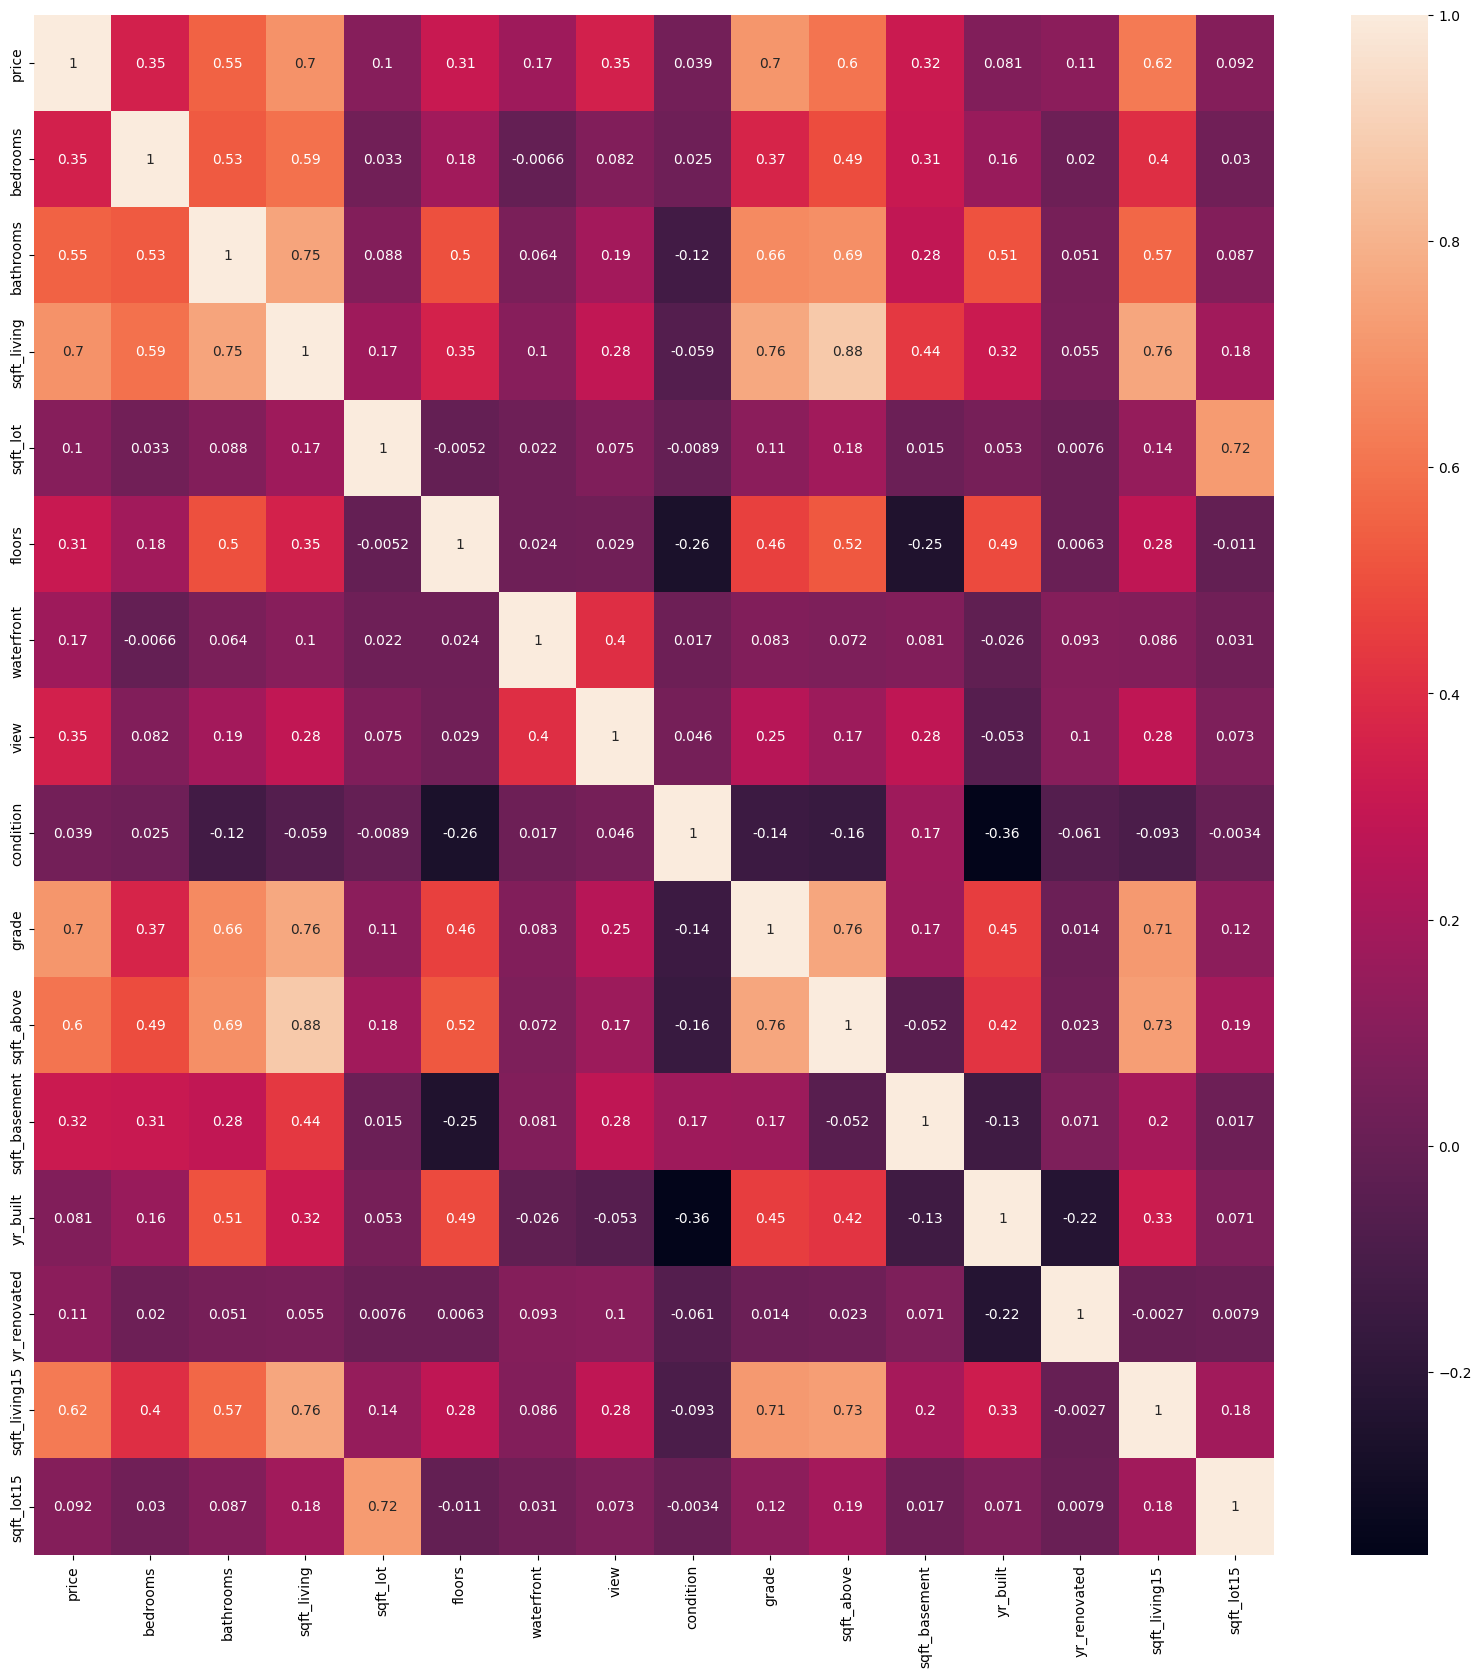

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

## **Models**

**we will predict the data based only on sqft_living**

In [23]:
x = data['sqft_living']
y = data['price']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_test,X_train,y_test,y_train= train_test_split(x,y,test_size=0.3,random_state=42)
lr_model = LinearRegression()
# x train one feature(1D array) and it should be 2D so we will do reshape
lr_model.fit(X_train.array.reshape(-1,1), y_train)

LinearRegression()

In [25]:
# slope value(b) in straight line Y'=bX(+-)c
lr_model.coef_

array([0.00039544])

In [26]:
lr_model.intercept_

12.224063265834891

In [27]:
y_pred = lr_model.predict(X_test.array.reshape(-1,1))

In [28]:
y_pred_original = np.exp(y_pred)
y_test_origina = np.exp(y_test)

In [29]:
from sklearn import metrics
metrics.mean_squared_error(y_test_origina,y_pred_original)

82498515162.05807

In [30]:
lr_model.score(X_test.array.reshape(-1,1), y_test)

0.4854297167307162

In [31]:
x2 = data.drop('price', axis=1)
y2 = data['price']


X_train,X_test,y_train,y_test = train_test_split(x2, y2, test_size=0.3, random_state=100)

model = LinearRegression()
model.fit(X_train, y_train)

y2_pred_log= model.predict(X_test)

y2_pred_original = np.exp(y2_pred_log)
y2_test_original = np.exp(y_test)

model.score(X_test,y_test)

0.6535089503838407

In [32]:
metrics.mean_squared_error(y2_test_original,y2_pred_original)

42395302146.46307

**when adding more features to predict on the model improved**

In [33]:
from xgboost import XGBRegressor

x2 = data.drop('price', axis=1)
y2 = data['price']

X_train,X_test,y_train,y_test = train_test_split(x2, y2, test_size=0.3, random_state=100)

model = XGBRegressor()
model.fit(X_train, y_train)

y2_pred_log = model.predict(X_test)

y2_pred_original = np.exp(y2_pred_log)

y_test_original = np.exp(y_test)

model.score(X_test,y_test)

0.7123255303693274

In [34]:
metrics.mean_squared_error(y_test_original, y2_pred_original)

38081487134.62007